In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import  norm


In [2]:
# load the data

data = pd.read_csv('houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\shubh\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<function matplotlib.pyplot.show(close=None, block=None)>

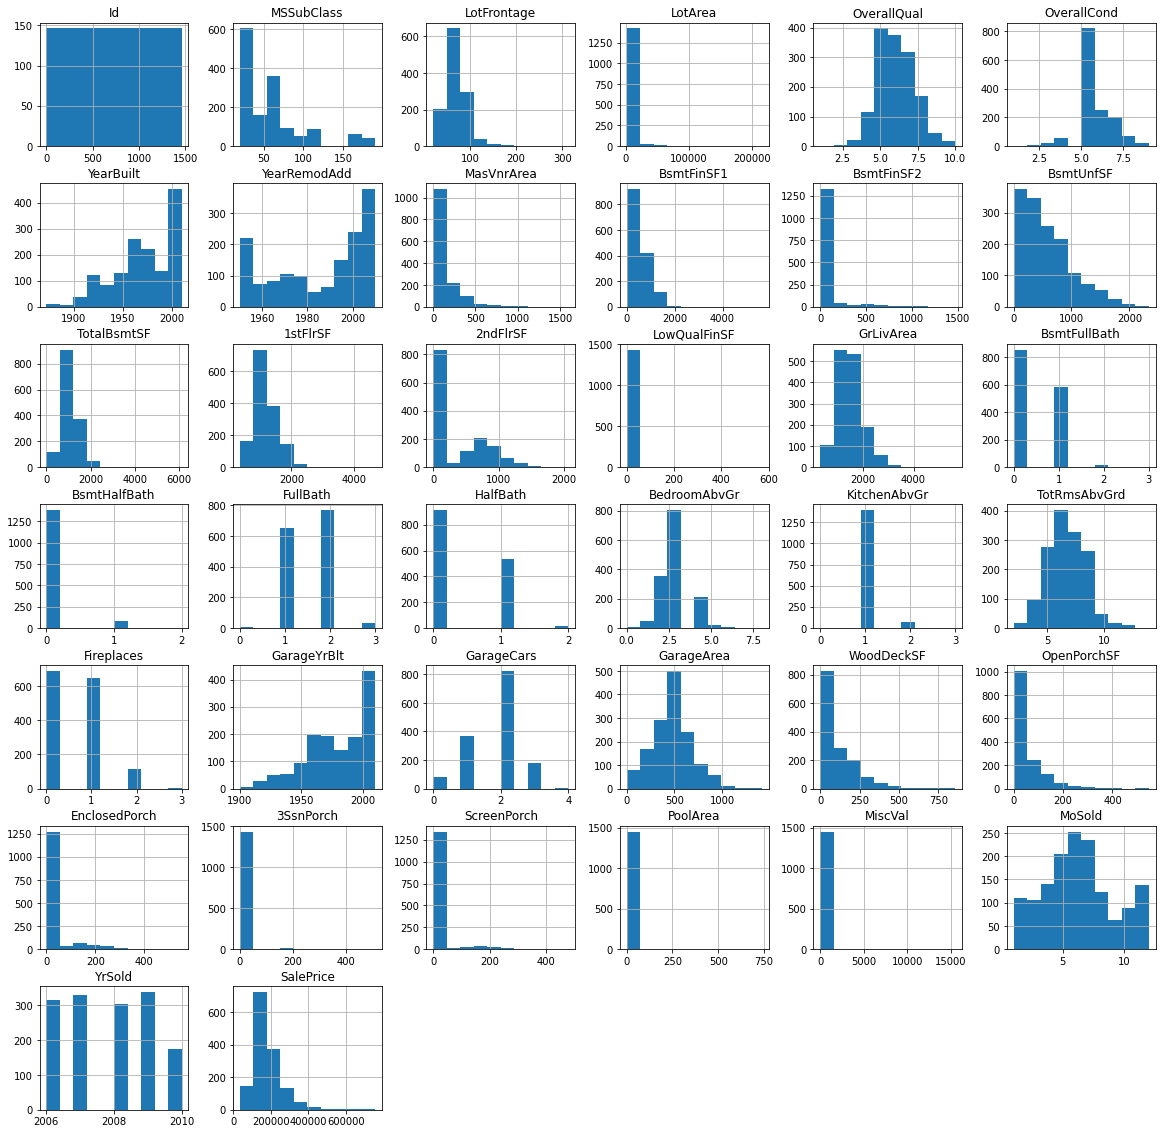

In [3]:
data.hist(figsize=(20,20))
plt.show

In [4]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots by creating a function diagnostic_plots to plot a histogram and a Q-Q plot
# side by side, for a certain variable
def diagnostic_plots(data, measure):
    fig = plt.figure(figsize=(7,7))
    axis= fig.gca()
    #hist plot
    data[measure].hist(ax=axis, bins=30)
    plt.show()
    #Q-Q plot
    stats.probplot(data[measure],dist='norm', plot=plt)
    plt.show()
    

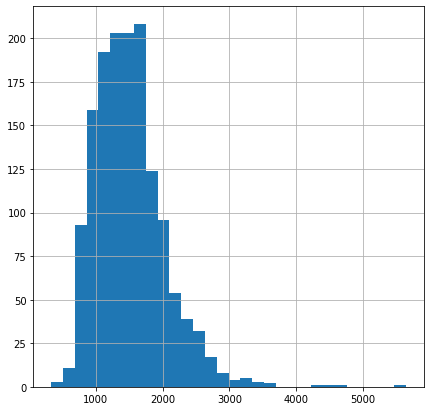

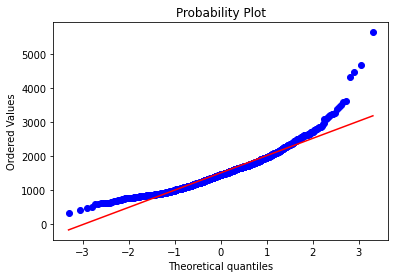

In [5]:
diagnostic_plots(data, 'GrLivArea')

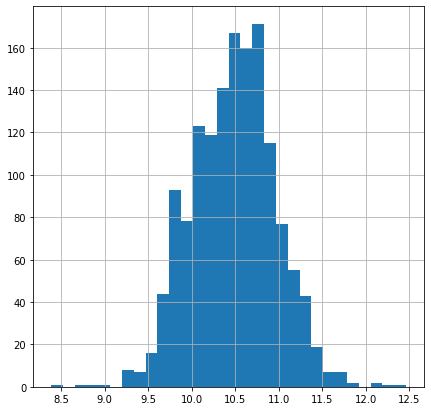

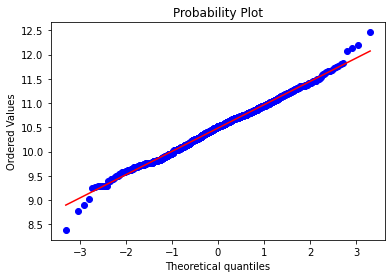

In [6]:
### Apply Logarithmic transformation on the "GrLivArea" data
data['log_transform']= np.log2(data.GrLivArea)
diagnostic_plots(data, 'log_transform')

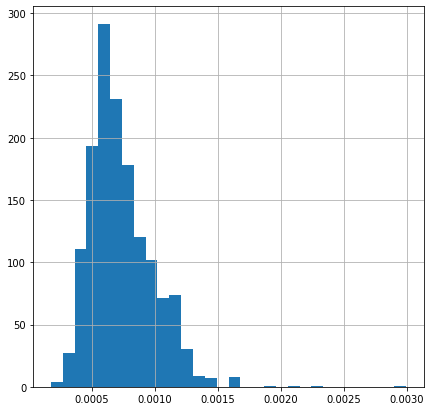

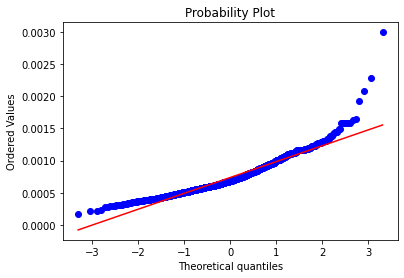

In [7]:
### Apply Reciprocal transformation
data['r_transform']=1/data.GrLivArea
diagnostic_plots(data, 'r_transform')

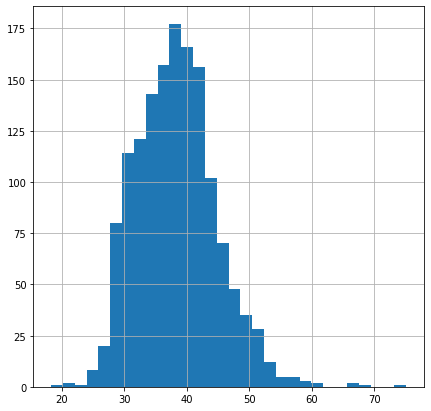

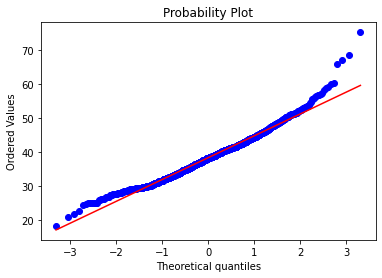

In [8]:
### Apply Square root transformation
data['sqrt_trans']=np.sqrt(data.GrLivArea)
diagnostic_plots(data, 'sqrt_trans')

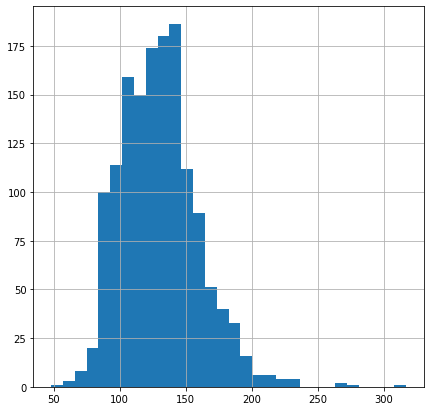

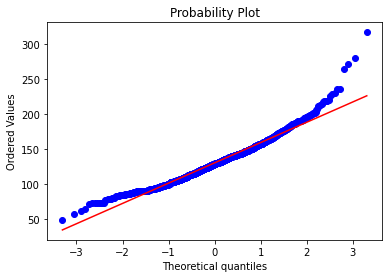

In [9]:
### Apply Exponential transformation
data['exp_trans']=data.GrLivArea**(1/1.5)
diagnostic_plots(data, 'exp_trans')

Optimal λ 0.006304924353543215


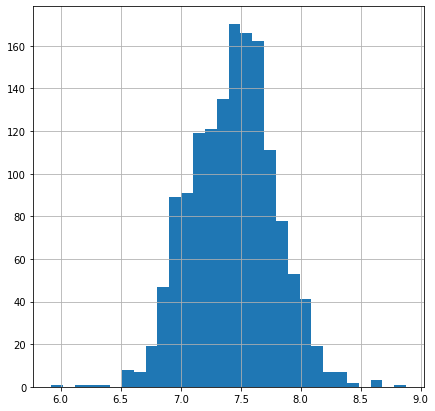

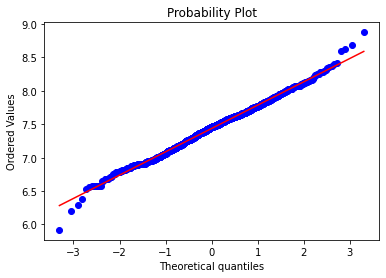

In [10]:
### Apply Box-Cox transformation
# find the optimal value of lambda
data['Box-Cox'],param=stats.boxcox(data.GrLivArea)
print("Optimal λ",param)
diagnostic_plots(data,'Box-Cox')

Optimal λ 0.005539641278705955


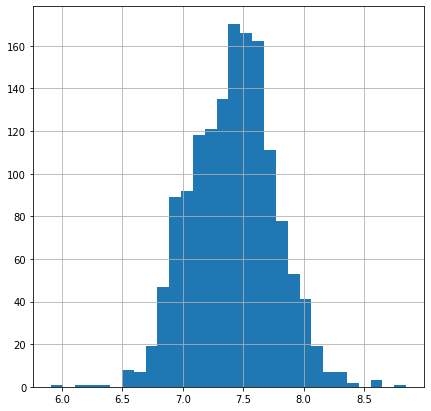

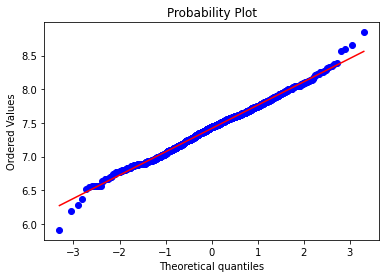

In [11]:
### Apply Yeo-Johnson transformation
# find the optimal value of lambda
data['Yeo-Johnson'],param=stats.yeojohnson(data.GrLivArea)
print("Optimal λ",param)
diagnostic_plots(data,'Yeo-Johnson')